In [ ]:
!pip install pysam

In [ ]:
from traitlets.traitlets import default
import pysam
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
!mkdir figures
!mkdir switches

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 50)

In [ ]:
def csvDataFrameImport(directory):
  frames_list_samples = []
  sample_names = []

  counter=1
  for filename in tqdm(os.listdir(directory)):
      if filename.endswith(".sam"):
          sample_names.append(filename[:8].strip())
          path = os.path.join(directory, filename)
          globals()[f"sample{counter}"] = pd.DataFrame(({'name': x.qname, 'seq': x.seq} for x in pysam.Samfile(path).fetch()))
          tqdm.write(f'dataframe {sample_names[-1]} has {len(globals()[f"sample{counter}"])} total rows')
          frames_list_samples.append(globals()[f"sample{counter}"])
          counter+=1
  print(f"found {len(frames_list_samples)} samples in {directory}")
  print(len(sample_names), sample_names)

  return(frames_list_samples, sample_names)

def matchSequence(row, sequence):
  if (sequence in row):
    return(True)
  else:
    return(False)

def findReadLength(row):
  return(len(row))

def trimseq(row, f_seq, r_seq, consensus):

  if row.forward_primer == True:
    f_seq_index = row.seq.find(f_seq)
    if f_seq_index == -1:
      print("no forward primer found")
      row.forward_primer = False
    row.seq = row.seq[f_seq_index:]

  if row.reverse_primer == True:
    r_seq_index = row.seq.find(r_seq)
    if r_seq_index == -1:
      print("no reverse primer found")
      row.reverse_primer = False
    row.seq = row.seq[:r_seq_index+len(r_seq)]
  if (row.forward_primer == False) & (row.reverse_primer == False):
    row.seq = ""
  if row.seq in consensus:
    row.seq = ""
  return(row)

def classify(row, consensus, classification):
  if row.classification != "other":
    return row
  if row.seq in consensus:
    row.classification = classification
  return row

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
forward_primer="GTTCGTACCCCTCTCGAGAATA"
reverse_primer="GGTCTTTCAGATGAGAAGTGGATGG"
lys2_consensus="GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGGCCTGACTCTTATACACAAGTAGCGTCCTGAACGGAACCTTTCCCGTTTTCCAGGATCTGATCTTCCATGTTAGGAGGTCACATGGAAGATCAGATCCTGGAAAACGGGAAAGGTTCCGTTCAGGACGCTACTTGTGTATAAGAGTCAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_type2 =     "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGCTACTTGTGTATAAGAGTCAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_type1 =     "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGGCCTGACTCTTATACACAAGTAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_full =      "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_J1 =        "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGACGCTACTTGTGTATAAGAGTCAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_type2_v2 =  "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_type5 =     "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGGCCTGACTCTTATACACAAGTAGCGTCCTGAACGGAACCTTTCCCGTTTTCCAGGATAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
ex_type2_v1 =  "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGATCCTGGAAAACGGGAAAGGTTCCGTTCAGGACGCTACTTGTGTATAAGAGTCAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTATCACCTATGGTACTTGGAACGAAAAATTTGCCTCAAATATTAAAGTTGTATTAGGCGATTTATCTAAAAGCCAATTTGGTCTTTCAGATGAGAAGTGGATGG"
#ex_J2 =        "GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGAAGGAAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCTCCTACATCCTTGCAGATTTGTTAGGACGTTCTCCAAAGAACTACAGTTTCAAAGTGTTTGCCCACGTCAGGGCCTGACTCTTATACACAAGTAGCGTCAGGGCCAAGGATGAAGAAGCTGCATTTGCAAGATTACAAAAGGCAGGTCTCAC"

In [ ]:
frames, names =  csvDataFrameImport('/content/drive/MyDrive/malkova_lab/deepSeqSAM')

  0%|          | 0/6 [00:00<?, ?it/s]

dataframe 1_S5_L00 has 984296 total rows
dataframe 2_S3_L00 has 1136699 total rows
dataframe 3_S4_L00 has 982384 total rows
dataframe 4_S1_L00 has 1019500 total rows
dataframe 5_S6_L00 has 1030658 total rows
dataframe 6_S2_L00 has 804774 total rows
found 6 samples in /content/drive/MyDrive/malkova_lab/deepSeqSAM
6 ['1_S5_L00', '2_S3_L00', '3_S4_L00', '4_S1_L00', '5_S6_L00', '6_S2_L00']


In [ ]:
copy_frames = frames.copy()

In [ ]:
frames = copy_frames.copy()

  0%|          | 0/6 [00:00<?, ?it/s]

no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse primer found
no reverse prime

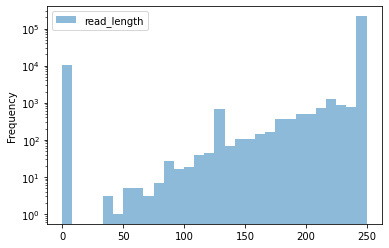

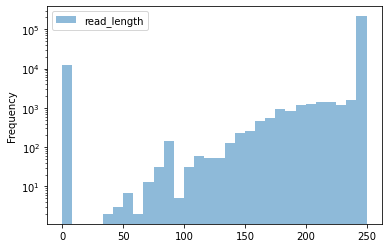

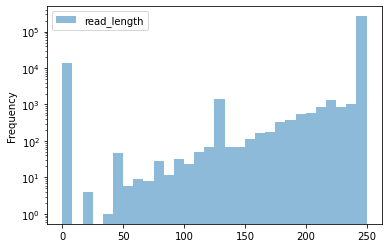

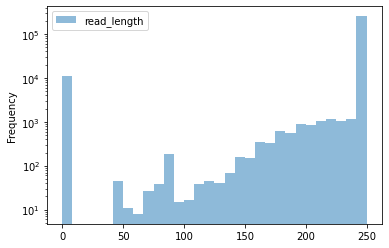

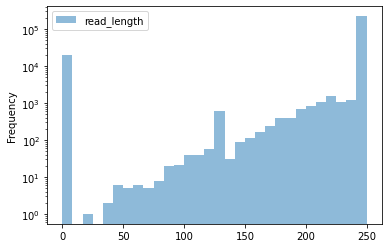

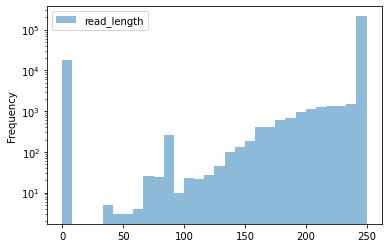

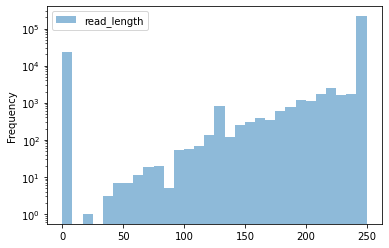

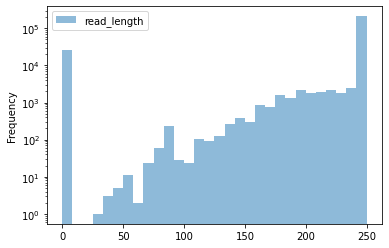

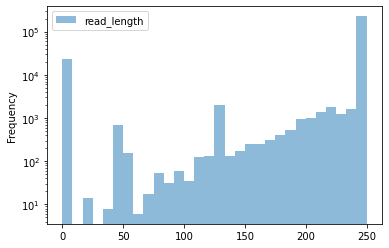

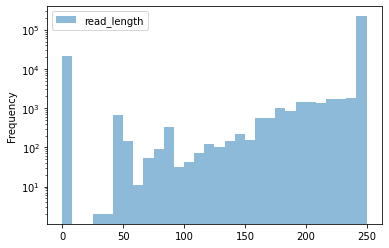

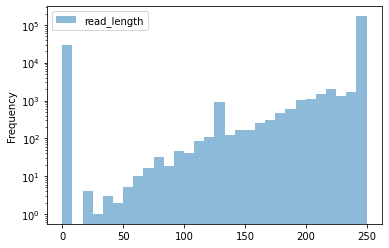

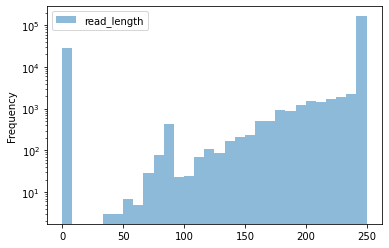

In [ ]:
for i in tqdm(range(len(frames))):

  frames[i]['forward_primer'] = frames[i].apply(lambda row: matchSequence(row.seq, forward_primer), axis=1)
  frames[i]['reverse_primer'] = frames[i].apply(lambda row: matchSequence(row.seq, reverse_primer), axis=1)

  frames[i] = frames[i].apply(lambda row: trimseq(row, forward_primer, reverse_primer, lys2_consensus), axis=1)

  print(frames[i])

  frames[i]['read_length'] = frames[i].apply(lambda row: findReadLength(row.seq), axis=1)
  #frames[i] = frames[i][frames[i]["read_length"] > 25 ]

  forward = (frames[i][frames[i]['forward_primer'] == True])
  reverse = (frames[i][frames[i]['reverse_primer'] == True])

  forward.plot(kind="hist", bins=30, log=True, alpha = 0.5)
  reverse.plot(kind="hist", bins=30, log=True, alpha = 0.5)

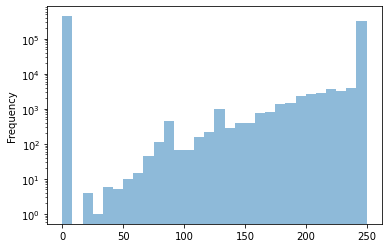

In [ ]:
frames[5]['read_length'].plot(kind="hist", bins=30, log=True, alpha = 0.5)

In [ ]:
i=5
print(frames[i][(frames[i].forward_primer == True) & (frames[i].reverse_primer == True)])
print(frames[i][frames[i]["read_length"] > 25])

                                                     name  \
6788    GWNJ-1013:243:GW2108081359th.Miseq:1:2102:1749...   
21514   GWNJ-1013:243:GW2108081359th.Miseq:1:2105:2116...   
21516   GWNJ-1013:243:GW2108081359th.Miseq:1:2105:2116...   
33678   GWNJ-1013:243:GW2108081359th.Miseq:1:2107:1257...   
33679   GWNJ-1013:243:GW2108081359th.Miseq:1:2107:1257...   
...                                                   ...   
797713  GWNJ-1013:243:GW2108081359th.Miseq:1:2277:2243...   
799984  GWNJ-1013:243:GW2108081359th.Miseq:1:2278:1479...   
799986  GWNJ-1013:243:GW2108081359th.Miseq:1:2278:1479...   
801175  GWNJ-1013:243:GW2108081359th.Miseq:1:2278:1634...   
801177  GWNJ-1013:243:GW2108081359th.Miseq:1:2278:1634...   

                                                      seq  forward_primer  \
6788    GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGA...            True   
21514   GTTCGTACCCCTCTCGAGAATATTTTGTTGAACCTAATAGTGCCGA...            True   
21516   GTTCGTACCCCTCTCGAGAATATTTTGT

                                                     seq  forward_primer  \
0      AAAAAAATTTTTGTGTTTGTTACCGGTGTCACAGGATTTCTGGGCT...           False   
1      AAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTG...           False   
2      AAAAACAACAATTAATGTGTTTGTTACCGGTGTCACAGGATTTCTG...           False   
3      AAAAATTGCCTCAAATATTATAGTTTTATTATGCGATGTATATAAT...           False   
4      AAAAATTTGCCTCAAATATTAAAGCTGTATTAGGCGATTTATCTAA...           False   
...                                                  ...             ...   
86301  TTTTTTTTTTTTTTTTTTGTTTTTTGGTTTTCTTTTTTTTTTTTTT...           False   
86302  TTTTTTTTTTTTTTTTTTGTTTTTTTGTTTTTTTTTTTTTTTTTGT...           False   
86303  TTTTTTTTTTTTTTTTTTTTTTTTGTTTTTTTTTTTTGTTTTTTTT...           False   
86304  TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...           False   
86305  TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...           False   

       reverse_primer  read_length  read_count classification  
0                True  

IndexError: ignored

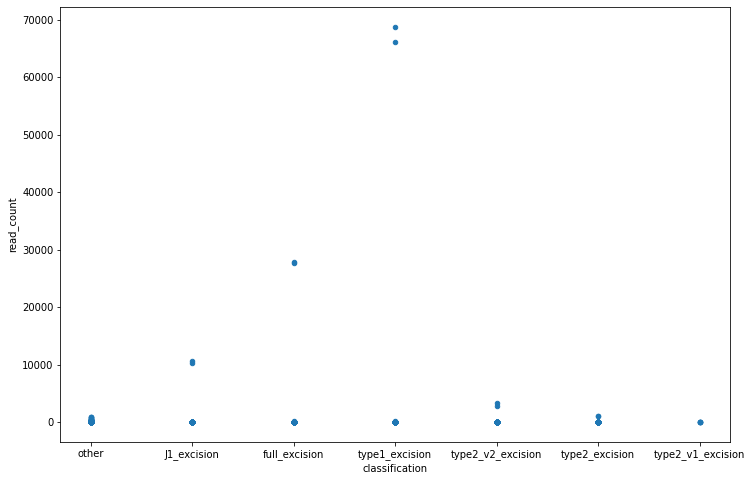

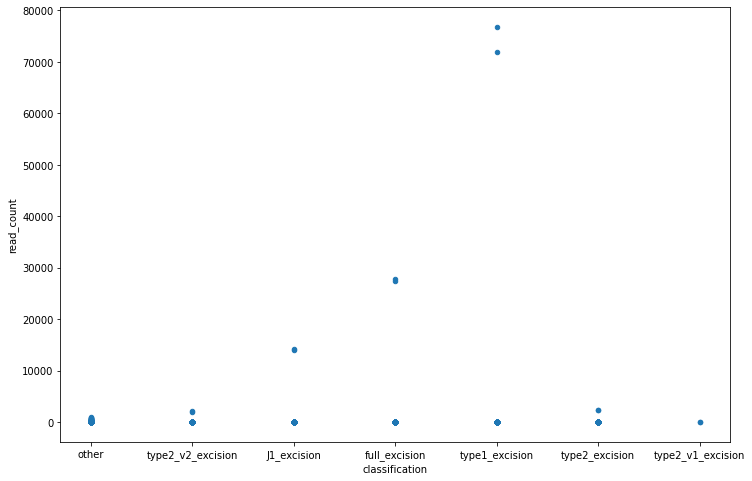

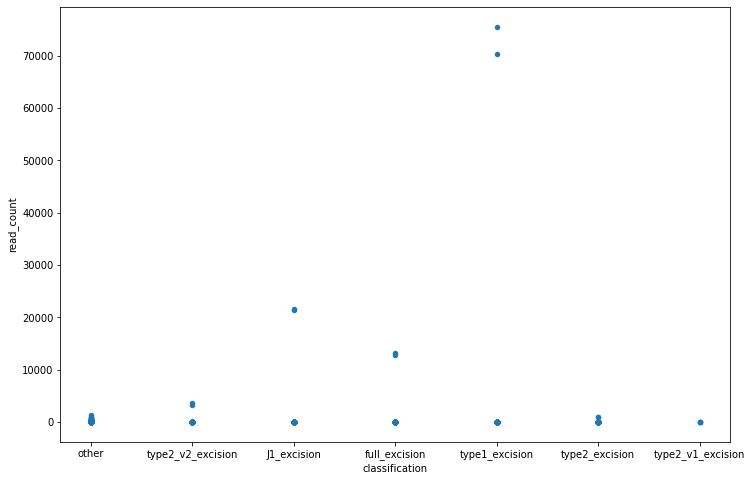

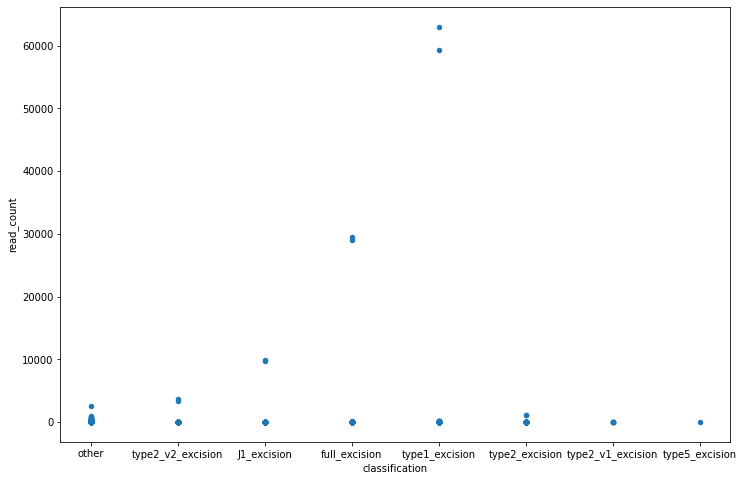

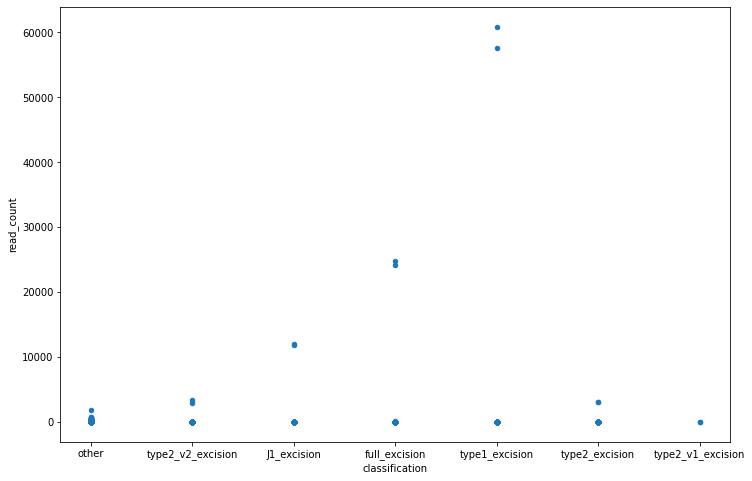

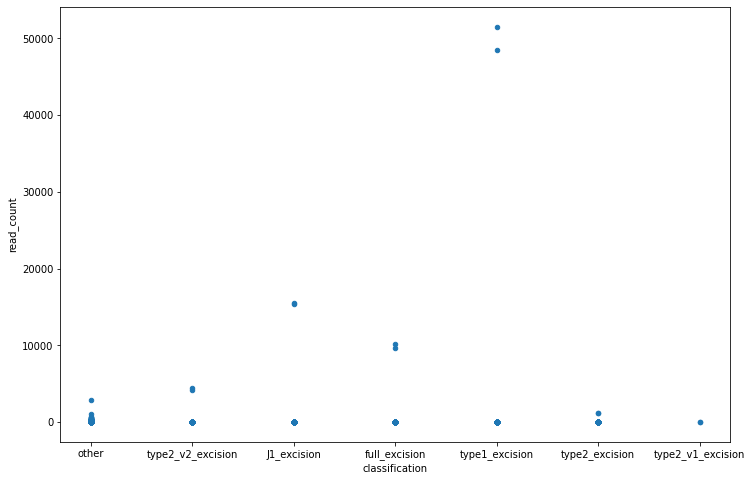

In [ ]:
for i in range(len(frames)):

  #print(frames[i])
  tmp = frames[i][frames[i]["read_length"] > 25]
  tmp = tmp[( tmp['forward_primer'] == True) | (tmp['reverse_primer'] == True) ]
  tmp = tmp.groupby(["seq", 'forward_primer', 'reverse_primer','read_length']).count().reset_index()
  tmp = tmp.rename(columns={"name": "read_count"})
  tmp["classification"] = "other"
  tmp = tmp.apply(lambda row: classify(row, ex_full, "full_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_type1, "type1_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_type2, "type2_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_J1, "J1_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_type2_v2, "type2_v2_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_type5, "type5_excision"), axis=1)
  tmp = tmp.apply(lambda row: classify(row, ex_type2_v1, "type2_v1_excision"), axis=1)

  print(tmp)
  tmp.plot(kind='scatter', x="classification", y='read_count', figsize=(12,8))
  tmp.to_csv(f'{names[i]}.csv', index=True)

In [ ]:
len(frames)
!mkdir csv_files
!mv *.csv csv_files
!zip -r /content/csv_files.zip /content/csv_files

  adding: content/csv_files/ (stored 0%)
  adding: content/csv_files/5_S6_L00.csv (deflated 95%)
  adding: content/csv_files/4_S1_L00.csv (deflated 95%)
  adding: content/csv_files/6_S2_L00.csv (deflated 95%)
  adding: content/csv_files/3_S4_L00.csv (deflated 94%)
  adding: content/csv_files/1_S5_L00.csv (deflated 95%)
  adding: content/csv_files/2_S3_L00.csv (deflated 95%)
